In [129]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import os

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

from scipy.cluster.hierarchy import fcluster
from collections import Counter

%matplotlib inline

path_data = os.path.join('..', 'data')

In [130]:
# data = pd.read_csv('tickers_train.csv')
data = pd.read_csv(os.path.join(path_data, 'train', 'tickers_train.csv'))
data.head()

,Unnamed: 0,datetime,name,priceBtc,priceUsd,ticker,volume
0,0,2018-03-01T00:00:00Z,0x,0.000087,0.902278,ZRX,8127100.0
1,1,2018-03-01T02:00:00Z,0x,0.000086,0.895107,ZRX,7962720.0
2,2,2018-03-01T04:00:00Z,0x,0.000088,0.917095,ZRX,7980440.0
3,3,2018-03-01T06:00:00Z,0x,0.000087,0.910295,ZRX,7554380.0
4,4,2018-03-01T08:00:00Z,0x,0.000087,0.927460,ZRX,7468790.0


In [131]:
df_y_train = pd.pivot_table(data, 
    values=['priceBtc', 'priceUsd', 'volume'], 
    index=['datetime'],
    columns=['ticker'])#.head()
df_y_train.sort_index(inplace=True)
df_y_train.index = pd.Series(pd.to_datetime(np.array(df_y_train.index))).apply(lambda x: x.timestamp())
print('index dif :', np.unique(np.array(df_y_train.index[1:]) - np.array(df_y_train.index[:-1])))
df_y_train.head()

index dif : [7200.]


priceBtc                                                        \
ticker           $PAC       1ST 1WO       ABT      ACAT       ACC       ACT   
1.519862e+09      NaN  0.000029 NaN  0.000114  0.000001  0.000100  0.000035   
1.519870e+09      NaN  0.000028 NaN  0.000115  0.000001  0.000107  0.000035   
1.519877e+09      NaN  0.000029 NaN  0.000115  0.000001  0.000110  0.000036   
1.519884e+09      NaN  0.000029 NaN  0.000115  0.000001  0.000103  0.000035   
1.519891e+09      NaN  0.000027 NaN  0.000114  0.000001  0.000100  0.000035   

                                        ...          volume             \
ticker             ADA       ADB ADH    ...             XVG        XZC   
1.519862e+09  0.000030  0.000002 NaN    ...      18653700.0  3852160.0   
1.519870e+09  0.000029  0.000002 NaN    ...      18850700.0  3857900.0   
1.519877e+09  0.000029  0.000002 NaN    ...      18282600.0  4010780.0   
1.519884e+09  0.000028  0.000002 NaN    ...      18203200.0  3993010.0   
1.519891e+09  0.000028  0.000002 NaN    ...      17933400.0  3689700.0   

                                                                            \
ticker                ZCL ZCO         ZEC        ZEN        ZIL        ZLA   
1.519862e+09  109027000.0 NaN  54766800.0  2259440.0  8196340.0  1453870.0   
1.519870e+09  106212000.0 NaN  53604900.0  2577900.0  7909660.0  1327050.0   
1.519877e+09  104332000.0 NaN  53318000.0  2740920.0  7671810.0  1137000.0   
1.519884e+09  109475000.0 NaN  53300600.0  2953900.0  7742030.0  1103730.0   
1.519891e+09   99679900.0 NaN  51532800.0  2749000.0  7918250.0  1096540.0   

                                    
ticker              ZPT        ZRX  
1.519862e+09  3449770.0  8127100.0  
1.519870e+09  3444390.0  7962720.0  
1.519877e+09  2562270.0  7980440.0  
1.519884e+09  5068710.0  7554380.0  
1.519891e+09  5489550.0  7468790.0  

[5 rows x 1527 columns]

In [132]:
field_pirce = 'priceUsd'#'priceBtc'
df_y_train_pct_change = df_y_train[field_pirce].pct_change(axis=0)
df_y_train_pct_change.head()

ticker,$PAC,1ST,1WO,ABT,ACAT,ACC,ACT,ADA,ADB,ADH,...,XVG,XZC,ZCL,ZCO,ZEC,ZEN,ZIL,ZLA,ZPT,ZRX
1.519862e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.519870e+09,NaN,-0.023543,NaN,0.011898,0.017634,0.071894,0.007766,-0.025529,-0.018092,NaN,...,0.008623,0.003168,-0.004082,NaN,0.010168,0.016010,0.007659,-0.008406,0.029356,-0.007948
1.519877e+09,NaN,0.017647,NaN,0.006138,-0.040081,0.036205,0.011816,-0.013019,-0.045659,NaN,...,0.000622,0.017858,-0.033696,NaN,-0.006678,-0.017226,0.007139,0.004333,0.001303,0.024564
1.519884e+09,NaN,0.003462,NaN,0.003836,-0.023964,-0.064824,-0.004614,-0.014305,0.014245,NaN,...,0.005091,-0.007534,-0.142138,NaN,0.009270,0.025107,0.012746,0.042622,-0.027297,-0.007414
1.519891e+09,NaN,-0.031964,NaN,0.008907,0.047343,-0.011668,0.014914,0.015624,0.028618,NaN,...,0.032656,0.024735,0.021793,NaN,0.012063,0.020599,0.011946,0.000824,0.110710,0.018857


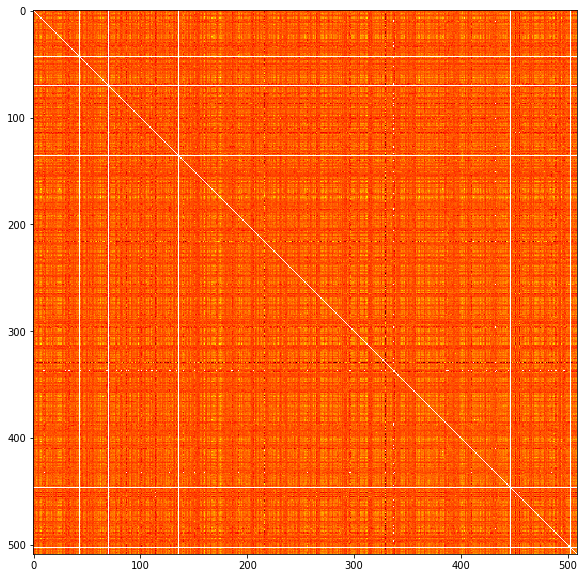

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(df_y_train_pct_change.corr(method='spearman'),cmap='hot',interpolation='nearest')

In [9]:
df_y_train.to_csv(os.path.join(path_data, 'prices_volumes.csv'))

In [159]:
df = df_y_train_pct_change.iloc[1:, :].replace([np.inf, -np.inf], np.nan).fillna(0)#.dropna()
print('df.shape :', df.shape )
print('np.where(df.abs().sum(axis=0)==0)', np.where(df.abs().sum(axis=0)==0))
tickers_bad = df.columns[list(np.where(df.abs().sum(axis=0)==0))]
print('tickers_bad', list(tickers_bad))
df.drop(columns=tickers_bad, inplace=True)
print('df.shape (after drop 0) :', df.shape)

Z=linkage(df.T, 'single', 'correlation')

ds_volume = df_y_train['volume'].sum(axis=0)


df.shape : (731, 509)
np.where(df.abs().sum(axis=0)==0) (array([ 43, 136, 446]),)
tickers_bad ['BBC', 'DML', 'TRAK']
df.shape (after drop 0) : (731, 506)


In [203]:
# max_d = 0.5
# clusters = fcluster(Z, max_d, criterion='distance')#

k = 50
clusters = fcluster(Z, k, criterion='maxclust')#
# # # clusters = fcluster(Z, 18, depth=2)

# print(len(clusters))
# print(np.unique(clusters))
cnt = Counter(clusters)
# cnt(clusters)
print(len(cnt.items()))
# print(cnt.most_common())
# # print(clusters)
for k, v in cnt.most_common():
    print ('{0} : {1} {2}'.format(k, v,
                                  sorted(list(df.columns[np.where(clusters==k)[0]]), 
                                         key=lambda x: ds_volume[x], reverse=True)
                                  [:20]).replace("'", ''))
#     print (sorted(list(df.columns[np.where(clusters==k)[0]]), key=lambda x: ds_volume[x], reverse=True)[:5])
#     print (list(df.columns[np.where(clusters==k)[0]]).sort(key=lambda x: ds_volume[x], reverse=True))
#     break

50
8 : 451 [BTC, ETH, EOS, XRP, BCH, LTC, TRX, ETC, ADA, QTUM, NEO, STORM, XVG, BNB, DASH, HT, MITH, VEN, ONT, XMR]
6 : 3 [DAN, BBI, SPD]
4 : 2 [CPC, ACC]
3 : 2 [CROP, IFC]
7 : 2 [W3C, GJC]
5 : 2 [GRMD, SRCOIN]
16 : 1 [1WO]
12 : 1 [ATC]
14 : 1 [ATX]
11 : 1 [AUC]
38 : 1 [BCA]
40 : 1 [BERRY]
42 : 1 [BRM]
18 : 1 [BSM]
23 : 1 [CBT]
28 : 1 [CLR]
25 : 1 [CRC]
44 : 1 [CVT]
47 : 1 [DAI]
22 : 1 [DROP]
36 : 1 [ERA]
45 : 1 [GRE]
43 : 1 [GRX]
20 : 1 [GUESS]
35 : 1 [HDG]
24 : 1 [HGT]
31 : 1 [JC]
29 : 1 [JEW]
39 : 1 [KNC]
33 : 1 [LKK]
13 : 1 [MNTP]
34 : 1 [NANJ]
19 : 1 [NCT]
15 : 1 [ODE]
30 : 1 [PAYX]
9 : 1 [PCL]
48 : 1 [PGL]
41 : 1 [PHI]
27 : 1 [PXC]
37 : 1 [STAR]
21 : 1 [SUP]
49 : 1 [TUSD]
46 : 1 [UCASH]
50 : 1 [USDT]
32 : 1 [VIT]
1 : 1 [WIN]
2 : 1 [XBP]
10 : 1 [XDCE]
26 : 1 [XHV]
17 : 1 [XTL]


In [45]:

df.columns[list(scipy.cluster.hierarchy.leaves_list(Z))]
# max(list(scipy.cluster.hierarchy.leaves_list(Z)))

Index(['GJC', 'KNC', 'FLUZ', 'GRE', 'JC', 'ACC', 'HDG', 'ERA', 'CPC', 'NOTE',
       ...
       'PPC', 'LTC', 'BNT', 'ETH', 'IFC', 'ZCO', 'TRAK', 'DML', 'BBC', 'BTC'],
      dtype='object', name='ticker', length=509)

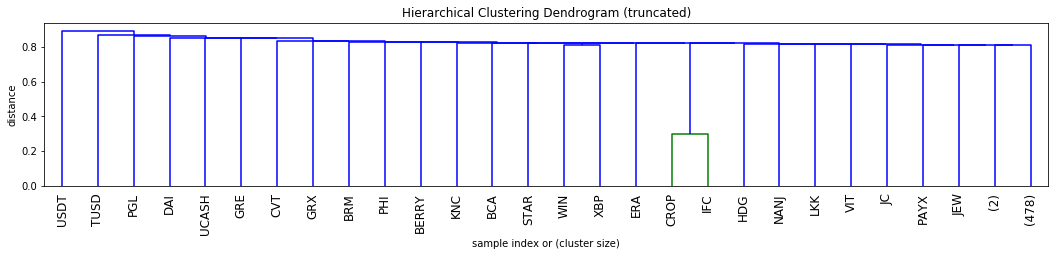

In [198]:
# Z = df
# Z=linkage(df.T, 'single')
fig, axes = plt.subplots(1, 1, figsize=(18, 3))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
#     truncate_mode='lastp',  # show only the last p merged clusters
    truncate_mode='mtica',  # 'lastp', 'mlab', 'mtica', 'level'
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
#     show_contracted=True,  # to get a distribution impression in truncated branches
    labels=df.columns,

)
plt.show()
# dendrogram(Z, color_threshold=0)

In [36]:
df.shape

(732, 509)

Automatically created module for IPython interactive environment
Compute unstructured hierarchical clustering...
Elapsed time: 0.03s
Number of points: 1500
Compute structured hierarchical clustering...
Elapsed time: 0.07s
Number of points: 1500


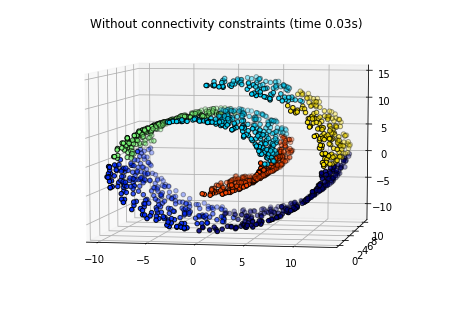

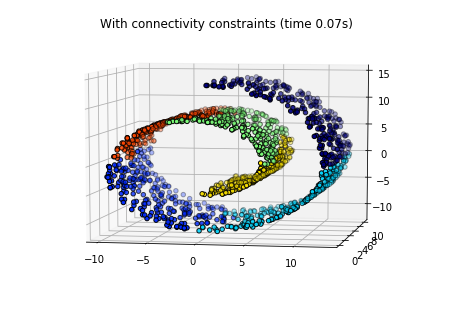

In [2]:
print(__doc__)

import time as time
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_swiss_roll

# #############################################################################
# Generate data (swiss roll dataset)
n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise)
# Make it thinner
X[:, 1] *= .5

# #############################################################################
# Compute clustering
print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)

# #############################################################################
# Plot result
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.scatter(X[label == l, 0], X[label == l, 1], X[label == l, 2],
               color=plt.cm.jet(np.float(l) / np.max(label + 1)),
               s=20, edgecolor='k')
plt.title('Without connectivity constraints (time %.2fs)' % elapsed_time)


# #############################################################################
# Define the structure A of the data. Here a 10 nearest neighbors
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)

# #############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, connectivity=connectivity,
                               linkage='ward').fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)

# #############################################################################
# Plot result
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.scatter(X[label == l, 0], X[label == l, 1], X[label == l, 2],
               color=plt.cm.jet(float(l) / np.max(label + 1)),
               s=20, edgecolor='k')
plt.title('With connectivity constraints (time %.2fs)' % elapsed_time)

plt.show()